# Data Preprocessing 

## Importing the libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import sparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats

## Importing the dataset

In [109]:
df1 = pd.read_csv('real_estate_data.csv')

In [110]:
df1.head()

,ad_id,list_id,list_time,date,account_id,projectid,project_oid,account_oid,account_name,state,...,ward,ward_name,price_million_per_m2,location,longitude,latitude,escrow_can_deposit,params,zero_deposit,street_name
0,149173109,109212357,1.712927e+12,3 ngày trước,4735114,2464,1582239957,b144d70d0cf27d2fb85f9acec319e1ad,MR TOÀN,accepted,...,9134.0,Xã Phước An,20.000000,"10.80574,105.48113",105.48113,10.80574,2.0,"[{'id': 'size', 'value': '100 m²', 'label': 'D...",False,Nguyễn Văn Cừ
1,156266188,115304264,1.712549e+12,1 tuần trước,19890442,2464,1582239957,2ca66c644efc61538b5b8c566a7b3601,Phước Bình Land,accepted,...,9134.0,Xã Phước An,21.000000,"10.8057,105.4811",105.48110,10.80570,2.0,"[{'id': 'size', 'value': '100 m²', 'label': 'D...",False,Đường Nguyễn Văn Cừ
2,156220843,115265512,1.712246e+12,2 tuần trước,9809355,2464,1582239957,9e980419635ca710ce81ced52d1fd372,DIEM,accepted,...,9134.0,Xã Phước An,33.333333,"10.8057,105.4811",105.48110,10.80570,2.0,"[{'id': 'size', 'value': '1000 m²', 'label': '...",False,Nguyễn Văn Cừ
3,155978499,115057158,1.711619e+12,3 tuần trước,25481412,2464,1582239957,ed86d1bdfae46ca66407c9ea8588d034,Nguyễn Khắc Thành,accepted,...,9134.0,Xã Phước An,12.380952,"10.8057,105.4811",105.48110,10.80570,2.0,"[{'id': 'size', 'value': '105 m²', 'label': 'D...",False,Nguyễn Văn Cừ
4,155935060,115019801,1.711522e+12,3 tuần trước,3737279,2464,1582239957,569a0038167cba4a32f856190c415c76,Khanh,accepted,...,9134.0,Xã Phước An,10.606061,"10.8057,105.4811",105.48110,10.80570,2.0,"[{'id': 'size', 'value': '33 m²', 'label': 'Di...",False,Nguyễn Văn Cừ


In [111]:
df2 = pd.read_csv('projects_data.csv')

In [112]:
df2.head()

,project_oid,area_v2,web_url,facilities_key,surrounding_key,investor_id,investor_name,paid_time,short_introduction_content,full_url_with_params
0,1582239957,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
1,405530665,Huyện Văn Giang,https://www.nhatot.com/du-an-khu-do-thi-ecopar...,"['shopping_center', 'sports_area', 'spa', 'swi...",[],975,Vihajico,1489981484830,1.Vị trí:Nằm tại Khu vực Đông Nam của Thành ph...,https://gateway.chotot.com/v1/public/api-pty/p...
2,1728959123,Huyện Bình Chánh,https://www.nhatot.com/du-an-nam-phong-eco-par...,['play_ground'],[],975,Vihajico,1507216430585,1.Vị tr&iacute;:nằm ngay trục đường ch&iacute;...,https://gateway.chotot.com/v1/public/api-pty/p...
3,1086443687,Huyện Cần Giờ,https://www.nhatot.com/du-an-vinhomes-long-bea...,[],[],53,Tập đoàn Vingroup,1675008369985,NaN,https://gateway.chotot.com/v1/public/api-pty/p...
4,914252993,Thành phố Thủ Dầu Một,https://www.nhatot.com/du-an-capitaland-binh-d...,[],[],190,Tập đoàn CapitaLand,1675010888324,NaN,https://gateway.chotot.com/v1/public/api-pty/p...


### MERGE DATAFRAME

In [113]:
# Join hai DataFrame lại với nhau
merged_df = pd.merge(df1, df2, on='project_oid', how='inner')

In [114]:
# Hiển thị kết quả
merged_df.head()

,ad_id,list_id,list_time,date,account_id,projectid,project_oid,account_oid,account_name,state,...,street_name,area_v2,web_url,facilities_key,surrounding_key,investor_id,investor_name,paid_time,short_introduction_content,full_url_with_params
0,149173109,109212357,1.712927e+12,3 ngày trước,4735114,2464,1582239957,b144d70d0cf27d2fb85f9acec319e1ad,MR TOÀN,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
1,156266188,115304264,1.712549e+12,1 tuần trước,19890442,2464,1582239957,2ca66c644efc61538b5b8c566a7b3601,Phước Bình Land,accepted,...,Đường Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
2,156220843,115265512,1.712246e+12,2 tuần trước,9809355,2464,1582239957,9e980419635ca710ce81ced52d1fd372,DIEM,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
3,155978499,115057158,1.711619e+12,3 tuần trước,25481412,2464,1582239957,ed86d1bdfae46ca66407c9ea8588d034,Nguyễn Khắc Thành,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...
4,155935060,115019801,1.711522e+12,3 tuần trước,3737279,2464,1582239957,569a0038167cba4a32f856190c415c76,Khanh,accepted,...,Nguyễn Văn Cừ,Huyện Nhơn Trạch,https://www.nhatot.com/du-an-khu-do-thi-dta-nh...,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA),1500192200337,1.Vị trí:Dự án khu đô thị DETACO NHƠN TRẠCH củ...,https://gateway.chotot.com/v1/public/api-pty/p...


In [115]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ad_id,10799.0,1.547402e+08,3.682284e+06,6.767304e+07,1.549620e+08,1.558632e+08,1.563237e+08,1.565653e+08
list_id,10799.0,1.140025e+08,3.077981e+06,4.548518e+07,1.141799e+08,1.149582e+08,1.153544e+08,1.155601e+08
list_time,10797.0,1.712322e+12,9.960234e+08,1.680831e+12,1.712191e+12,1.712578e+12,1.712904e+12,1.713161e+12
account_id,10799.0,1.429056e+07,9.465195e+06,1.075000e+03,4.307953e+06,1.424641e+07,2.364268e+07,2.687750e+07
projectid,10799.0,2.380554e+03,1.672870e+03,2.000000e+00,5.300000e+02,2.175000e+03,4.010000e+03,4.896000e+03
project_oid,10799.0,1.062025e+09,6.129401e+08,9.173000e+04,5.326421e+08,1.024583e+09,1.585037e+09,2.147353e+09
category,10799.0,1.013693e+03,8.755311e+00,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.040000e+03
area,10799.0,8.671090e+01,4.109370e+01,1.000000e+00,6.400000e+01,1.070000e+02,1.190000e+02,1.300000e+02
region,10799.0,1.043782e+01,4.333243e+00,1.000000e+00,1.050000e+01,1.300000e+01,1.300000e+01,1.300000e+01
price,10797.0,4.724539e+09,1.368403e+10,1.900000e+06,1.750000e+09,2.500000e+09,4.200000e+09,7.500000e+11


In [116]:
merged_df.describe(include="object").T

,count,unique,top,freq
date,10799,69,1 tuần trước,2025
account_oid,10799,3850,e5b0e2d7cef2609b59b20156a782cb48,49
account_name,10799,3581,Lê Tiến Huy,60
state,10799,1,accepted,10799
subject,10799,10608,căn hộ,14
body,10799,10596,Căn hộ Diyas Sky nằm tại vị trí đắc địa số 16 ...,5
category_name,10799,4,Căn hộ/Chung cư,8767
area_name,10799,128,Thành phố Thủ Đức,2473
region_name,10799,43,Tp Hồ Chí Minh,7190
type,10799,2,s,10796


### THU GIẢM DỮ LIỆU

In [117]:
# Loại bỏ cột không sử dụng
columns_to_drop = ['ad_id'
                   , 'list_id'
                   ,'list_time'
                   ,'date'
                   ,'account_id'
                   ,'account_oid'
                   ,'account_name'
                   ,'state'
                   ,'region_v2'
                   ,'type'
                   ,'price_string'
                   ,'escrow_can_deposit'
                   ,'params','paid_time'
                   ,'short_introduction_content'
                   ,'state'
                   ,'body'
                   ,'area'
                   ,'region'
                   ,'type'
                   ,'price_string'
                   ,'company_ad'
                   ,'region'
                   ,'ward'
                   ,'location'
                   ,'longitude'
                   ,'latitude'
                   ,'escrow_can_deposit'
                   ,'params'
                   ,'category'
                   ,'zero_deposit'
                   ,'web_url'
                   ,'short_introduction_content'
                   ,'full_url_with_params']
merged_df = merged_df.drop(columns=columns_to_drop)

In [118]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject    category_name  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...            Nhà ở   
1                                  Hàng ngộp cần bán gấp            Nhà ở   
2                                           kẹt tiền trả            Nhà ở   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...            Nhà ở   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...  Căn hộ/Chung cư   
...                                                  ...              ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn        

### Xử lý dữ liệu trùng lặp

In [119]:
# Đếm số lượng dữ liệu trùng lặp
duplicate_count = merged_df.duplicated().sum()

In [120]:
print(f"Số lượng dữ liệu trùng lặp trước khi xử lý: {duplicate_count}")

Số lượng dữ liệu trùng lặp trước khi xử lý: 75


In [123]:
# Xử lý dữ liệu trùng lặp
merged_df.drop_duplicates(inplace=True)

In [124]:
# Đếm số lượng dữ liệu trùng lặp sau khi xử lý
duplicate_count = merged_df.duplicated().sum()

In [125]:
print(f"Số lượng dữ liệu lặp sau xử lý: {duplicate_count}")

Số lượng dữ liệu lặp sau xử lý: 0


### Thay thế dữ liệu thiếu
Các tập dữ liệu thường chứa các giá trị thiếu, điều này có thể gây ra vấn đề cho các thuật toán học máy. Thay thế dữ liệu thiếu được gọi là bù đắp dữ liệu (data imputation).

In [126]:
for i in range(len(merged_df.columns)):
    missing_data = merged_df[merged_df.columns[i]].isna().sum()
    perc = missing_data / len(merged_df) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 0, percentage 0.00
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 0, percentage 0.00
>5,  missing entries: 0, percentage 0.00
>6,  missing entries: 2, percentage 0.02
>7,  missing entries: 1028, percentage 9.59
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 2, percentage 0.02
>10,  missing entries: 2, percentage 0.02
>11,  missing entries: 4, percentage 0.04
>12,  missing entries: 0, percentage 0.00
>13,  missing entries: 0, percentage 0.00
>14,  missing entries: 0, percentage 0.00
>15,  missing entries: 0, percentage 0.00
>16,  missing entries: 250, percentage 2.33


In [127]:
# Đếm số lượng giá trị thiếu trong mỗi cột
missing_values_count = merged_df.isnull().sum()

print("Số lượng giá trị thiếu trong mỗi cột:")
print(missing_values_count)

Số lượng giá trị thiếu trong mỗi cột:
projectid                  0
project_oid                0
subject                    0
category_name              0
area_name                  0
region_name                0
price                      2
rooms                   1028
size                       0
ward_name                  2
price_million_per_m2       2
street_name                4
area_v2                    0
facilities_key             0
surrounding_key            0
investor_id                0
investor_name            250
dtype: int64


<Axes: >

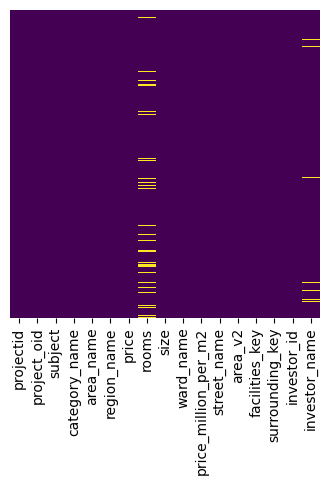

In [128]:
plt.figure(figsize = (4,4)) #hiển thị các giá trị thiếu trong tập dữ liệu
sns.heatmap(merged_df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [129]:
# Điền giá trị trung bình cho các cột dữ liệu thiếu
merged_df['price'].fillna(merged_df['price'].mean(), inplace=True)
merged_df['rooms'].fillna(merged_df['rooms'].mean(), inplace=True)
merged_df['price_million_per_m2'].fillna(merged_df['price_million_per_m2'].mean(), inplace=True)

In [130]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid                 0
project_oid               0
subject                   0
category_name             0
area_name                 0
region_name               0
price                     0
rooms                     0
size                      0
ward_name                 2
price_million_per_m2      0
street_name               4
area_v2                   0
facilities_key            0
surrounding_key           0
investor_id               0
investor_name           250
dtype: int64


#### Do các thuộc tính ward_name, street_name, investor_name không phải số nên chúng ta sẽ xử lý sau

In [131]:
# Danh sách các cột bạn muốn kiểm tra null
# Do các có ít bản ghi là string nên ta loại bỏ cũng không ảnh hưởng nhiều đến kết quả train
columns_to_check_null = ['ward_name', 'street_name', 'investor_name']

# Loại bỏ dòng có giá trị null trong các cột đã chỉ định
merged_df = merged_df.dropna(subset=columns_to_check_null)


In [132]:
# Kiểm tra lại DataFrame sau khi điền giá trị thiếu
print(merged_df.isnull().sum())

projectid               0
project_oid             0
subject                 0
category_name           0
area_name               0
region_name             0
price                   0
rooms                   0
size                    0
ward_name               0
price_million_per_m2    0
street_name             0
area_v2                 0
facilities_key          0
surrounding_key         0
investor_id             0
investor_name           0
dtype: int64


In [133]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject    category_name  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...            Nhà ở   
1                                  Hàng ngộp cần bán gấp            Nhà ở   
2                                           kẹt tiền trả            Nhà ở   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...            Nhà ở   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...  Căn hộ/Chung cư   
...                                                  ...              ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn        

### Xử lý giá trị nhiễu

In [134]:
merged_df.head(1)

,projectid,project_oid,subject,category_name,area_name,region_name,price,rooms,size,ward_name,price_million_per_m2,street_name,area_v2,facilities_key,surrounding_key,investor_id,investor_name
0,2464,1582239957,chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...,Nhà ở,Huyện Nhơn Trạch,Đồng Nai,2.000000e+09,2.0,100.0,Xã Phước An,20.0,Nguyễn Văn Cừ,Huyện Nhơn Trạch,"['play_ground', 'fire_alarm', 'elevator', 'par...","['school', 'hospital', 'atm', 'banks']",378,Công ty Cổ phần Đệ Tam (DTA)


In [135]:
def handle_outliers(df, column_name, lower_percentile=0.05, upper_percentile=0.95):
    """
    Hàm lọc giá trị nhiễu trong một cột của DataFrame bằng phương pháp Winsorizing.
    
    Parameters:
    df (pd.DataFrame): DataFrame cần xử lý
    column_name (str): Tên cột cần lọc giá trị nhiễu
    lower_percentile (float): Phần trăm thấp hơn để xác định ngưỡng dưới (mặc định là 0.05)
    upper_percentile (float): Phần trăm cao hơn để xác định ngưỡng trên (mặc định là 0.95)
    
    Returns:
    pd.DataFrame: DataFrame đã được thay thế các giá trị nhiễu
    """
    lower_bound = df[column_name].quantile(lower_percentile)
    upper_bound = df[column_name].quantile(upper_percentile)
    
    # Giá trị nhiễu trước khi lọc
    outliers_before = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Total outliers in {column_name} before filtering: {outliers_before.shape[0]}\n")

    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    
    # Giá trị sau khi lọc
    outliers_after = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Total outliers in {column_name} after filtering (should be 0): {outliers_after.shape[0]}\n")
    
    return df

In [136]:
# Loại bỏ các giá trị nhiễu
columns_to_handle = ["rooms"
                     , "price"
                     , "size"
                     , "price_million_per_m2"]

for column_name in columns_to_handle:
    merged_df = handle_outliers(merged_df, column_name)

Total outliers in rooms before filtering: 291

Total outliers in rooms after filtering (should be 0): 0

Total outliers in price before filtering: 1013

Total outliers in price after filtering (should be 0): 0

Total outliers in size before filtering: 1037

Total outliers in size after filtering (should be 0): 0

Total outliers in price_million_per_m2 before filtering: 1044

Total outliers in price_million_per_m2 after filtering (should be 0): 0



In [137]:
print(merged_df)

       projectid  project_oid  \
0           2464   1582239957   
1           2464   1582239957   
2           2464   1582239957   
3           2464   1582239957   
4           2464   1582239957   
...          ...          ...   
10794       3931   1833333982   
10795       4397   1312047912   
10796       4818    453709511   
10797       4266   1964432767   
10798       4460   1786510809   

                                                 subject    category_name  \
0      chủ vỡ nợ ban gấp nhà DTA 100m2 1 trệt 1 lầu t...            Nhà ở   
1                                  Hàng ngộp cần bán gấp            Nhà ở   
2                                           kẹt tiền trả            Nhà ở   
3      Chính Chủ Cần Bán Gấp Căn Nhà Dự Án DTA giá bá...            Nhà ở   
4      Chính chủ bán lỗ căn chung 33m2 xã Phước An gầ...  Căn hộ/Chung cư   
...                                                  ...              ...   
10794             chính chủ cần bán lô Tân Long 1 sổ sẵn        

## Mã hóa dữ liệu phân loại

In [138]:
# Khởi tạo LabelEncoder
label_encoders = {}
columns_to_encode = [
    'subject', 'category_name', 'area_name', 'region_name',
    'ward_name', 'street_name', 'area_v2', 'facilities_key',
    'surrounding_key', 'investor_name'
]

# Hàm chuyển đổi chuỗi danh sách thành chuỗi đơn giản
def convert_list_to_string(lst):
    if isinstance(lst, str):
        try:
            lst = eval(lst)
            if isinstance(lst, list):
                return ', '.join(lst)
        except:
            return lst
    return lst


In [139]:
# Mã hóa nhãn cho từng cột và lưu LabelEncoder
for column in columns_to_encode:
    label_encoder = LabelEncoder()
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].apply(convert_list_to_string)
    # Chuyển tất cả giá trị trong cột thành chuỗi
    merged_df[column] = merged_df[column].astype(str)
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

    # Lưu LabelEncoder cho cột đó
    label_encoders[column] = label_encoder


In [140]:
# Lưu dataframe đã mã hóa ra file CSV mới
merged_df.to_csv('preprocessed_data.csv', index=False)